#### <font color='crimson'>Data Set Information:</font>

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

# Attribute Information:

Input variables:
## bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
## related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
## other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
## social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

# <font color='crimaon'>Import Required Library</font>

In [108]:
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

In [109]:
#reading file
bank = pd.read_csv('bank-full.csv', sep=';')
print('Shape of our data {}'.format(bank.shape))
pd.options.display.float_format='{:,.2f}'.format
bank= pd.read_csv("bank-full.csv",sep= ';')
bank.head()

Shape of our data (45211, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


There are 45211 observations in this dataset. Each represents an existing customer that the bank reached via phone calls

1)for each observation, the dataset records 17 input variables that stand for both qualitative and quantitative attributes of the customer, such as age, job, housing and personal loan status, account balance, and the number of contacts.

2)There is a single binary output variable that denotes “yes” or “no” revealing the outcomes of the phone calls.

## Categorical Variable Reading

In [110]:
bank['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [111]:
## to many unknown values droping this colum
bank.drop(['poutcome'],axis = 1, inplace = True)

## Data Info

In [112]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
y            45211 non-null object
dtypes: int64(7), object(9)
memory usage: 5.5+ MB


In [113]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,"45,211.00","45,211.00","45,211.00","45,211.00","45,211.00","45,211.00","45,211.00"
mean,40.94,"1,362.27",15.81,258.16,2.76,40.20,0.58
std,10.62,"3,044.77",8.32,257.53,3.10,100.13,2.30
min,18.00,"-8,019.00",1.00,0.00,1.00,-1.00,0.00
25%,33.00,72.00,8.00,103.00,1.00,-1.00,0.00
50%,39.00,448.00,16.00,180.00,2.00,-1.00,0.00
75%,48.00,"1,428.00",21.00,319.00,3.00,-1.00,0.00
max,95.00,"102,127.00",31.00,"4,918.00",63.00,871.00,275.00


## Null Value Detection

In [114]:
bank.isnull().sum().to_frame()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


 There is no missing value in this dataset.

## Creating and transforming data

Some changes were made to the column name, units and data types for easier analysis.



In [115]:
bank['education'].value_counts().to_frame()

,education
secondary,23202
tertiary,13301
primary,6851
unknown,1857


In [116]:
bank['education']= bank['education'].replace('unknown','primary')
bank['education'].value_counts().to_frame()

,education
secondary,23202
tertiary,13301
primary,8708


In [117]:
bank['job'].value_counts().to_frame()

,job
blue-collar,9732
management,9458
technician,7597
admin.,5171
services,4154
retired,2264
self-employed,1579
entrepreneur,1487
unemployed,1303
housemaid,1240


In [118]:
bank['marital'].value_counts().to_frame()

,marital
married,27214
single,12790
divorced,5207


In [119]:
bank.groupby(['marital'])['job'].value_counts()

marital   job          
divorced  management       1111
          technician        925
          admin.            750
          blue-collar       750
          services          549
          retired           425
          housemaid         184
          entrepreneur      179
          unemployed        171
          self-employed     140
          unknown            17
          student             6
married   blue-collar      6968
          management       5400
          technician       4052
          admin.           2693
          services         2407
          retired          1731
          entrepreneur     1070
          self-employed     993
          housemaid         912
          unemployed        731
          unknown           203
          student            54
single    management       2947
          technician       2620
          blue-collar      2014
          admin.           1728
          services         1198
          student           878
          self-e

In [120]:
bank['job']= bank['job'].replace('unknown','student')
bank['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student          1226
Name: job, dtype: int64

In [121]:
bank['duration'].value_counts()

124     188
90      184
89      177
122     175
104     175
       ... 
2150      1
1970      1
1906      1
1842      1
2015      1
Name: duration, Length: 1573, dtype: int64

In [122]:
# Change the unit of 'duration' from seconds to minutes
bank['duration'] = bank['duration'].apply(lambda n:n/60).round(2)

In [124]:
bank['month'].value_counts()

may    13750
jul     6884
aug     6240
jun     5338
nov     3965
apr     2930
feb     2648
jan     1403
oct      726
sep      574
mar      477
dec      214
Name: month, dtype: int64

In [125]:
## Change 'month' from words to numbers for easier analysis
bank['month']=bank['month'].replace('jan',1)
bank['month']=bank['month'].replace('feb',2)
bank['month']=bank['month'].replace('mar',3)
bank['month']=bank['month'].replace('apr',4)
bank['month']=bank['month'].replace('may',5)
bank['month']=bank['month'].replace('jun',6)
bank['month']=bank['month'].replace('jul',7)
bank['month']=bank['month'].replace('aug',8)
bank['month']=bank['month'].replace('sep',9)
bank['month']=bank['month'].replace('oct',10)
bank['month']=bank['month'].replace('Nov',11)
bank['month']=bank['month'].replace('Dec',12)

In [126]:
bank.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,5,4.35,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,5,2.52,1,-1,0,no


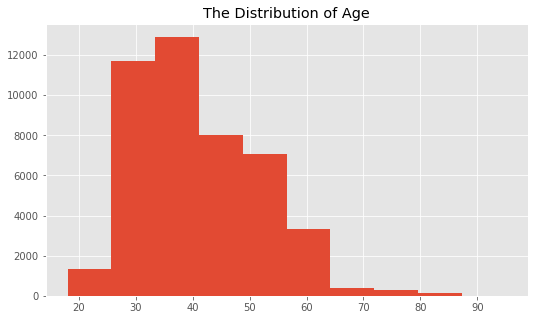

In [127]:
age_y = plt.figure(figsize = (19,5))
qw = age_y.add_subplot(1,2,1)
qw.hist(bank['age'])
qw.set_title('The Distribution of Age')
plt.show()

 In its telemarketing campaigns, clients called by the bank have an extensive age range, from 18 to 95 years old. However, a majority of customers called is in the age of 30s and 40s (33 to 48 years old fall within the 25th to 75th percentiles). The distribution of customer age is fairly normal with a small standard deviation.

In [128]:
bank.duration.value_counts()

2.07     188
1.50     184
1.48     177
1.90     175
1.73     175
        ... 
23.45      1
24.52      1
30.57      1
28.83      1
20.75      1
Name: duration, Length: 1567, dtype: int64

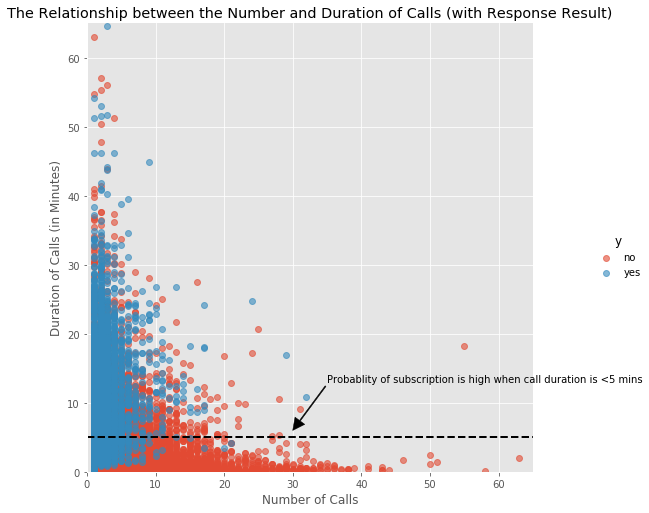

In [129]:
import seaborn as sns
dur_cam = sns.lmplot(y='duration', x='campaign',data = bank,
                     hue = 'y',
                     fit_reg = False,
                     scatter_kws={'alpha':0.6}, height =7)

plt.axis([0,65,0,65])
plt.xlabel('Number of Calls')
plt.ylabel('Duration of Calls (in Minutes)')
plt.title('The Relationship between the Number and Duration of Calls (with Response Result)')

# Annotation
plt.axhline(y=5, linewidth=2, color="k", linestyle='--')
plt.annotate('Probablity of subscription is high when call duration is <5 mins',xytext = (35,13),
             arrowprops=dict(color = 'k', width=1),xy=(30,6))
plt.show()

In this scatter plot, clients subscribed to term deposits are denoted as "yes" while those did not are denoted as "no".

As we can see from the plot, “yes” clients and “no” clients are forming two relatively separate clusters. Compared to “no” clients”, “yes” clients were contacted by fewer times and had longer call duration. More importantly, after ten campaign calls, clients are more likely to reject the term deposit unless the duration is high. Most “yes” clients were approached by less than 10 times number of calls.

This suggests that the bank should resist calling a client for more than five times, which can be disturbing and increase dissatisfaction.

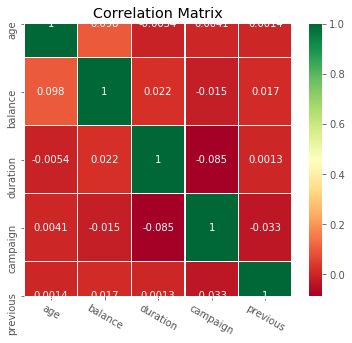

In [130]:
corr_data = bank[['age','balance','duration','campaign','month','previous','y']]
corr = corr_data.corr()

cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(6,5)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

The scatter matrix does not reveal any clear relationship among age, balance, duration and campaign.

To investigate more about correlation, a correlation matrix was plotted with all qualitative variables. Clearly, “campaign outcome” has a strong correlation with “duration”, a moderate correlation with “previous contacts”, and mild correlations between “balance”, “month of contact” and “number of campaign”.

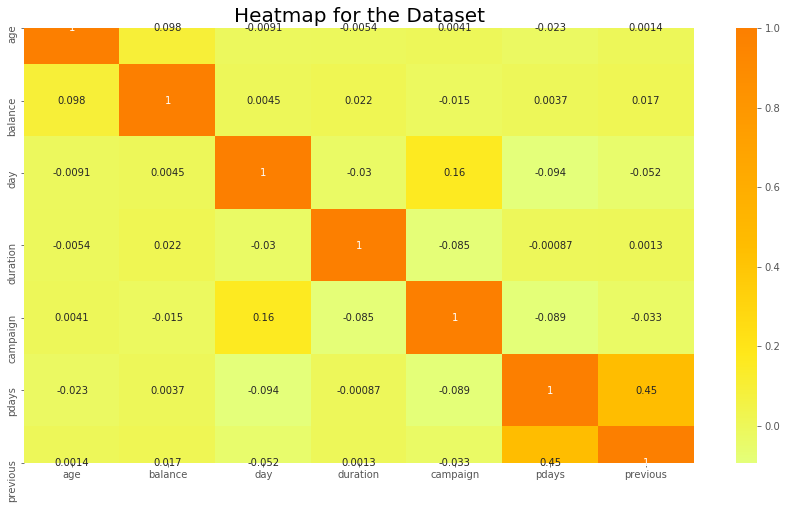

In [131]:
# making a heat map
plt.rcParams['figure.figsize'] = (15, 8)
plt.style.use('ggplot')

sns.heatmap(bank.corr(), annot = True, cmap = 'Wistia')
plt.title('Heatmap for the Dataset', fontsize = 20)
plt.show()

# <font color='crimson'>----------------------------------------- Label Encoder ---------------------------------</font>

##  Encode categorical variable

In [132]:
# use scikit-learn LabelEncoder to encode labels
le = LabelEncoder()

# Convert categorical variable
bank.job= le.fit_transform(bank.job)
bank.marital = le.fit_transform(bank.marital)
bank.education = le.fit_transform(bank.education)
bank.default = le.fit_transform(bank.default)
bank.housing = le.fit_transform(bank.housing)
bank.loan = le.fit_transform(bank.loan)


# binary transform of column contact categorical: "cellular","telephone"
bank.contact = le.fit_transform(bank.contact)
bank.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,4,1,2,0,2143,1,0,2,5,5,4.35,1,-1,0,no
1,44,9,2,1,0,29,1,0,2,5,5,2.52,1,-1,0,no


In [133]:
X = bank.drop(['y'],axis = 1)
y = bank['y'].values

In [134]:
X = pd.get_dummies(X , drop_first = True )

In [135]:
X_train, X_test , y_train , y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [136]:
sc=StandardScaler()
x_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

X_train: (36119, 25)
X_test: (9030, 25)
y_train: (36119,)
y_test: (9030,)


#  <font color='crimson'>----------------------------------------- Logistic Regression ---------------------------------</font>

In [137]:
log = LogisticRegression()
log.fit(X_train, y_train)

y_pred = log.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.90      0.98      0.94      7969
         yes       0.55      0.19      0.28      1061

    accuracy                           0.89      9030
   macro avg       0.73      0.58      0.61      9030
weighted avg       0.86      0.89      0.86      9030



In [138]:
log.get_params

<bound method BaseEstimator.get_params of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)>

In [139]:
log = LogisticRegression(penalty = 'l2', max_iter = 10000, C=5, class_weight = 'balanced')
log.fit(X_train, y_train)

y_pred = log.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.97      0.82      0.89      7969
         yes       0.37      0.79      0.50      1061

    accuracy                           0.82      9030
   macro avg       0.67      0.81      0.70      9030
weighted avg       0.90      0.82      0.84      9030



In [140]:
log = LogisticRegression(solver= 'liblinear',max_iter= 500,tol= 0.001, class_weight = 'balanced', C = 5)
log.fit(X_train, y_train)

y_pred = log.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          no       0.97      0.82      0.89      7969
         yes       0.37      0.79      0.50      1061

    accuracy                           0.82      9030
   macro avg       0.67      0.81      0.70      9030
weighted avg       0.90      0.82      0.84      9030



# <font color='crimson'>----------------------------------------- DecisonTree ---------------------------------</font>

In [141]:
Ds = DecisionTreeClassifier()
Ds.fit(X_train, y_train)

y_pred = Ds.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.93      0.92      0.93      7969
         yes       0.47      0.50      0.48      1061

    accuracy                           0.87      9030
   macro avg       0.70      0.71      0.71      9030
weighted avg       0.88      0.87      0.88      9030



In [142]:
Ds.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [143]:
Ds = DecisionTreeClassifier( criterion= 'gini',min_samples_leaf = 5, max_depth = 400,
                            max_features= 'auto', class_weight = 'balanced')

Ds.fit(X_train, y_train)

y_pred = Ds.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.97      0.82      0.89      7969
         yes       0.37      0.79      0.51      1061

    accuracy                           0.82      9030
   macro avg       0.67      0.81      0.70      9030
weighted avg       0.90      0.82      0.85      9030



# <font color='crimson'>----------------------------------------- Random Forest ---------------------------------</font>

In [144]:
Rf = RandomForestClassifier()
Rf.fit(X_train, y_train)

y_pred= Rf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.93      0.96      0.95      7969
         yes       0.61      0.44      0.51      1061

    accuracy                           0.90      9030
   macro avg       0.77      0.70      0.73      9030
weighted avg       0.89      0.90      0.89      9030



In [145]:
Rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [146]:
Rf = RandomForestClassifier(n_estimators = 50, max_depth = 5,class_weight = 'balanced')

Rf.fit(X_train,y_train)

y_pred = Rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.97      0.79      0.87      7969
         yes       0.34      0.84      0.49      1061

    accuracy                           0.79      9030
   macro avg       0.66      0.81      0.68      9030
weighted avg       0.90      0.79      0.83      9030



# <font color='crimson'>----------------------------------------- XGBoost ------------------------------------------</font>

In [147]:
Xg_Boost = XGBClassifier()
Xg_Boost.fit(X_train, y_train)

y_pre = Xg_Boost.predict(X_test)

print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

          no       0.93      0.96      0.95      7969
         yes       0.61      0.50      0.55      1061

    accuracy                           0.90      9030
   macro avg       0.77      0.73      0.75      9030
weighted avg       0.90      0.90      0.90      9030



In [148]:
Xg_Boost.get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)>

In [153]:
Xg_Boost = XGBClassifier(max_depth = 26, n_estimators = 600,class_weight = 'balanced')
Xg_Boost.fit(X_train, y_train)

y_pre= Xg_Boost.predict(X_test)

print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

          no       0.93      0.95      0.94      7969
         yes       0.58      0.49      0.53      1061

    accuracy                           0.90      9030
   macro avg       0.76      0.72      0.74      9030
weighted avg       0.89      0.90      0.89      9030



# <font color='crimson'>----------------------------------------- AdABoosting ---------------------------------</font>

In [154]:
AdaBoost =  AdaBoostClassifier()
AdaBoost.fit(X_train, y_train)

y_pred = AdaBoost.predict(X_test)

print( classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.92      0.97      0.94      7969
         yes       0.56      0.33      0.41      1061

    accuracy                           0.89      9030
   macro avg       0.74      0.65      0.68      9030
weighted avg       0.87      0.89      0.88      9030



In [155]:
AdaBoost.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

In [156]:
AdaBoost = AdaBoostClassifier(n_estimators = 100, random_state = 87)
AdaBoost.fit(X_train, y_train)

y_pred = AdaBoost.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.92      0.97      0.94      7969
         yes       0.58      0.34      0.43      1061

    accuracy                           0.89      9030
   macro avg       0.75      0.65      0.69      9030
weighted avg       0.88      0.89      0.88      9030



# <font color='crimson'>----------------------------------------- Bagging ---------------------------------</font>

In [157]:
bagging = BaggingClassifier()
bagging.fit(X_train, y_train)

y_pred = bagging.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.92      0.96      0.94      7969
         yes       0.56      0.38      0.45      1061

    accuracy                           0.89      9030
   macro avg       0.74      0.67      0.70      9030
weighted avg       0.88      0.89      0.88      9030



In [158]:
bagging.get_params()

{'base_estimator': None,
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## Models Compilation

In [159]:
algo = []
tr = []
te= []

In [162]:
# Base model

# Logistic Regression
log = LogisticRegression()
log.fit(X_train, y_train)
algo.append('Logistic Regression')
tr.append(log.score(X_train,y_train))
te.append(log.score(X_test,y_test))

# Decision Tree
Ds = DecisionTreeClassifier()
Ds.fit(X_train, y_train)
algo.append('Decision Tree')
tr.append(Ds.score(X_train,y_train))
te.append(Ds.score(X_test,y_test))

# RandomForest
Rf = RandomForestClassifier()
Rf.fit(X_train, y_train)
algo.append('Random Forest')
tr.append(Rf.score(X_train,y_train))
te.append(Rf.score(X_test,y_test))

# XG Boost
Xg_Boost = XGBClassifier()
Xg_Boost.fit(X_train, y_train)
algo.append('XG Boost')
tr.append(Xg_Boost.score(X_train,y_train))
te.append(Xg_Boost.score(X_test,y_test))

# ADA Boost
AdaBoost =  AdaBoostClassifier()
AdaBoost.fit(X_train, y_train)
algo.append('ADA Boost')
tr.append(AdaBoost.score(X_train,y_train))
te.append(AdaBoost.score(X_test,y_test))

# Bagging
bagging = BaggingClassifier()
bagging.fit(X_train, y_train)
algo.append('Bagging')
tr.append(bagging.score(X_train,y_train))
te.append(bagging.score(X_test,y_test))

In [163]:
# params model

# Logistic Regression
log = LogisticRegression(penalty = 'l2', max_iter = 10000, C=5, class_weight = 'balanced')
log.fit(X_train, y_train)
algo.append('Logistic Regression')
tr.append(log.score(X_train,y_train))
te.append(log.score(X_test,y_test))

# Decision Tree
Ds = DecisionTreeClassifier( criterion= 'gini',min_samples_leaf = 5, max_depth = 400,
                            max_features= 'auto', class_weight = 'balanced')
Ds.fit(X_train, y_train)
algo.append('Decision Tree')
tr.append(Ds.score(X_train,y_train))
te.append(Ds.score(X_test,y_test))

# Random Forest
Rf = RandomForestClassifier(n_estimators = 50, max_depth = 5,class_weight = 'balanced')
Rf.fit(X_train,y_train)
algo.append('Random Forest')
tr.append(Rf.score(X_train,y_train))
te.append(Rf.score(X_test,y_test))

# XG_Boost
Xg_Boost = XGBClassifier(max_depth = 26, n_estimators = 600,class_weight = 'balanced')
Xg_Boost.fit(X_train, y_train)
algo.append('XG Boost')
tr.append(Xg_Boost.score(X_train,y_train))
te.append(Xg_Boost.score(X_test,y_test))

# ADA Boost
AdaBoost = AdaBoostClassifier(n_estimators = 100, random_state = 87)
AdaBoost.fit(X_train, y_train)
algo.append('ADA Boost')
tr.append(AdaBoost.score(X_train,y_train))
te.append(AdaBoost.score(X_test,y_test))

In [168]:
result = pd.DataFrame()
result['Model Name']= algo
result['Train Score'] =tr
result['Test Score']= te
result= result.set_index('Model Name')
print(result)

ValueError: Length of values does not match length of index